In [2]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

loading data from csv

In [3]:
df = pd.read_csv("../measurements")
df.head()

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,ID,Week,Date
229,Satine,RGB_1.png,Depth_1.png,2.6,0.14,8.2,12.0,80.6,1,2021-W1,2021-01-04
362,Satine,RGB_2.png,Depth_2.png,2.1,0.10,8.5,8.2,67.4,2,2021-W1,2021-01-04
258,Satine,RGB_3.png,Depth_3.png,2.0,0.09,7.5,9.5,65.0,3,2021-W1,2021-01-04
263,Satine,RGB_4.png,Depth_4.png,2.7,0.13,6.0,10.6,78.7,4,2021-W1,2021-01-04
224,Lugano,RGB_5.png,Depth_5.png,2.3,0.11,8.3,9.8,73.9,5,2021-W1,2021-01-04


Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 229 to 163
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Variety            388 non-null    object 
 1   RGB_Image          388 non-null    object 
 2   Depth_Information  388 non-null    object 
 3   FreshWeightShoot   388 non-null    float64
 4   DryWeightShoot     388 non-null    float64
 5   Height             388 non-null    float64
 6   Diameter           388 non-null    float64
 7   LeafArea           388 non-null    float64
 8   ID                 388 non-null    int64  
 9   Week               388 non-null    object 
 10  Date               388 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 36.4+ KB


<AxesSubplot: >

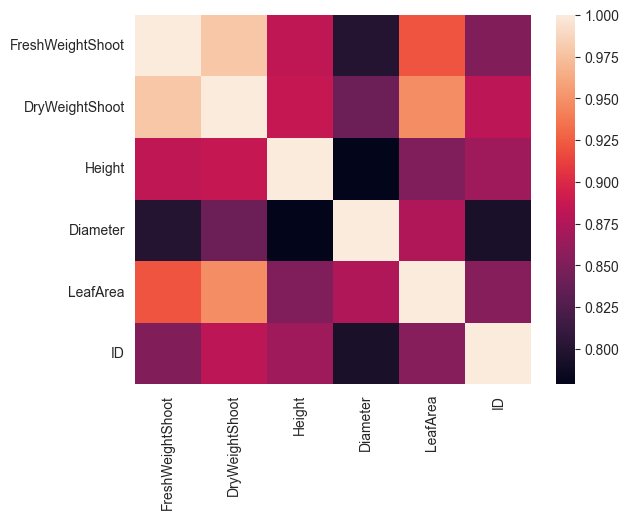

In [22]:
sns.heatmap(df.corr())

In [5]:
df.isna().sum()

Variety              0
RGB_Image            0
Depth_Information    0
FreshWeightShoot     0
DryWeightShoot       0
Height               0
Diameter             0
LeafArea             0
ID                   0
Week                 0
Date                 0
dtype: int64

Analysis

In [6]:
print(f"shape df = {df.shape}")

shape df = (388, 11)


In [7]:
df.describe()

,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,ID
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,115.455155,5.378144,12.325773,22.632216,1840.687371,195.175258
std,109.082466,4.541808,4.837003,6.291594,1521.690221,113.048777
min,1.400000,0.090000,4.300000,8.200000,57.600000,1.000000
25%,23.200000,1.555000,8.000000,18.100000,537.700000,97.750000
50%,78.200000,4.030000,12.000000,22.000000,1520.850000,194.500000
75%,184.325000,8.587500,16.000000,26.525000,2900.100000,292.250000
max,459.700000,20.100000,25.000000,42.000000,6875.400000,391.000000


In [8]:
df.Variety.value_counts()

Salanova    102
Satine       98
Lugano       96
Aphylion     92
Name: Variety, dtype: int64

In [9]:
def box_variety_features(variety, features=["Height", "Diameter","DryWeightShoot"]):
    df2 =df.loc[df["Variety"] == variety]
    sns.boxplot(df2[features]).set(title=f"Boxplot {variety} for {features}")

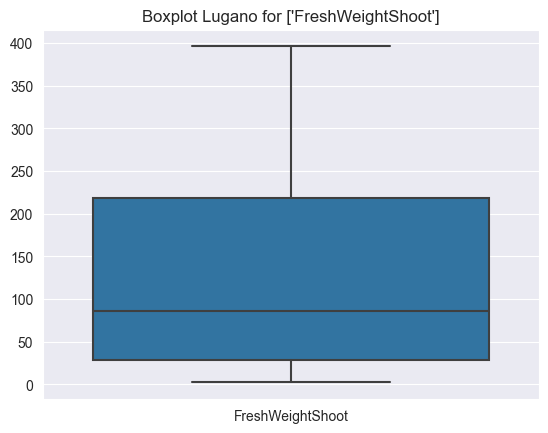

In [10]:
box_variety_features("Lugano", features=["FreshWeightShoot"])

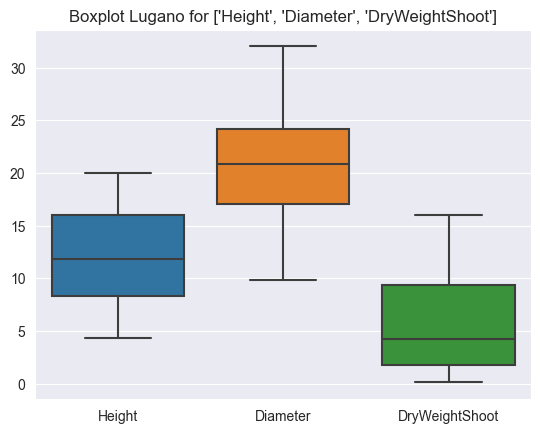

In [11]:
box_variety_features("Lugano")

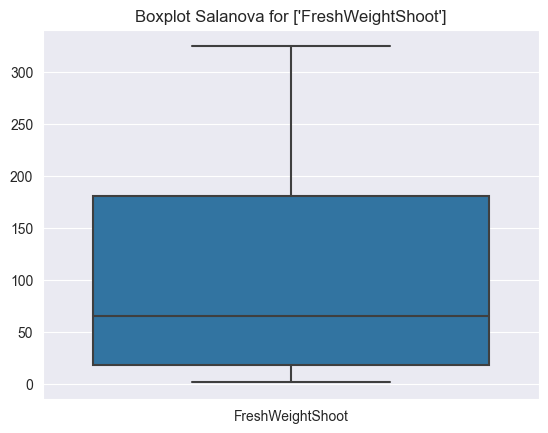

In [12]:
box_variety_features("Salanova", features=["FreshWeightShoot"])

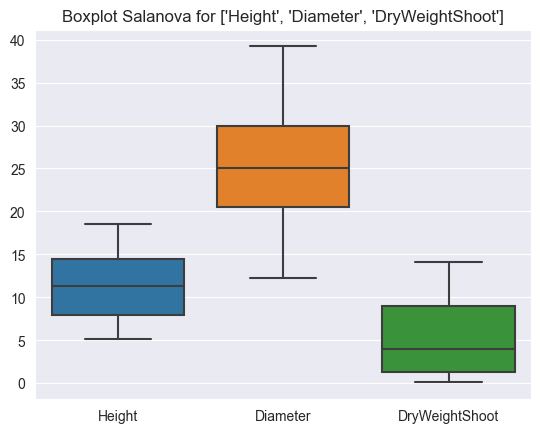

In [13]:
box_variety_features("Salanova")

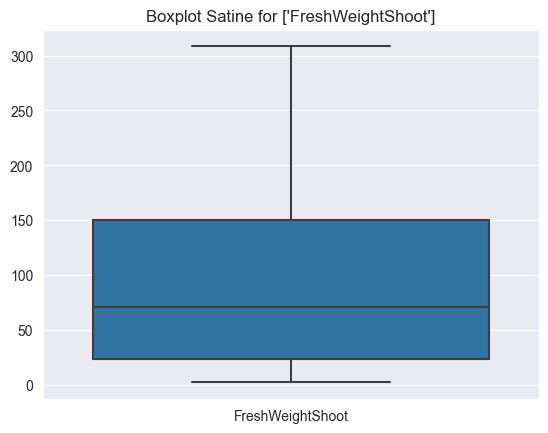

In [14]:
box_variety_features("Satine", features=["FreshWeightShoot"])

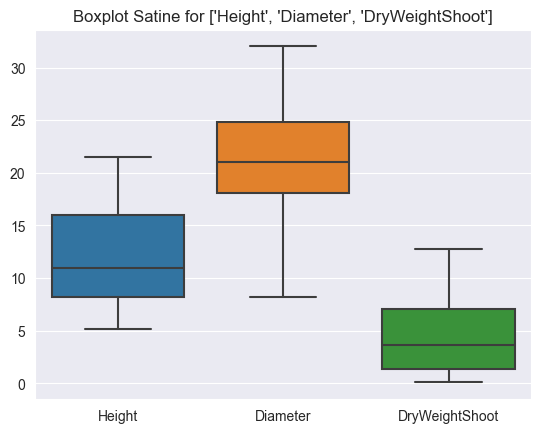

In [15]:
box_variety_features("Satine")

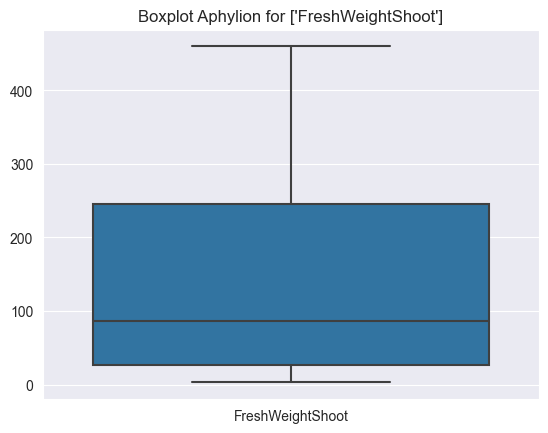

In [16]:
box_variety_features("Aphylion", features=["FreshWeightShoot"])

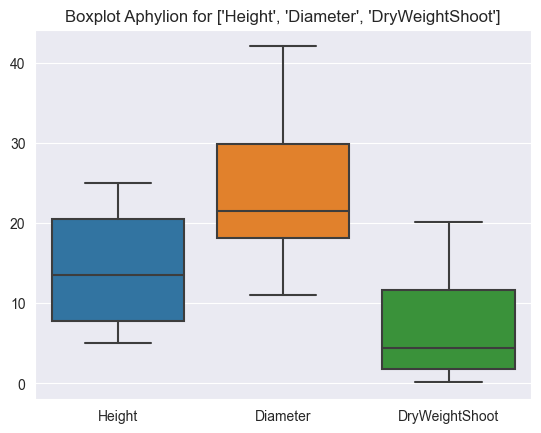

In [17]:
box_variety_features("Aphylion")

<AxesSubplot: title={'center': 'instances per Variety'}>

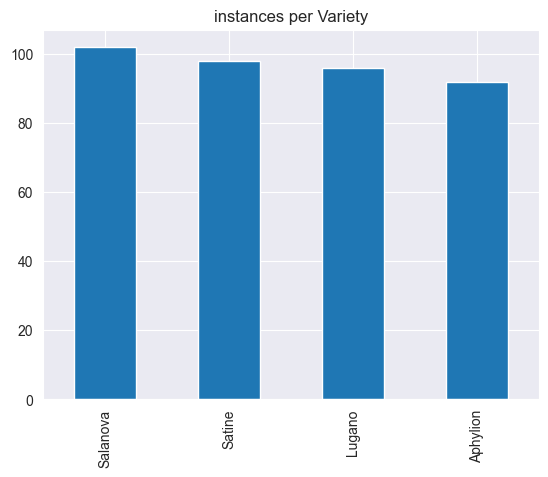

In [18]:
df.Variety.value_counts().sort_values(ascending=False).plot(kind='bar',title="instances per Variety")

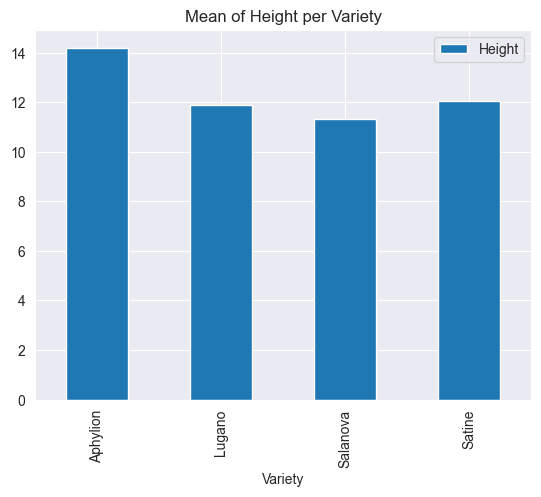

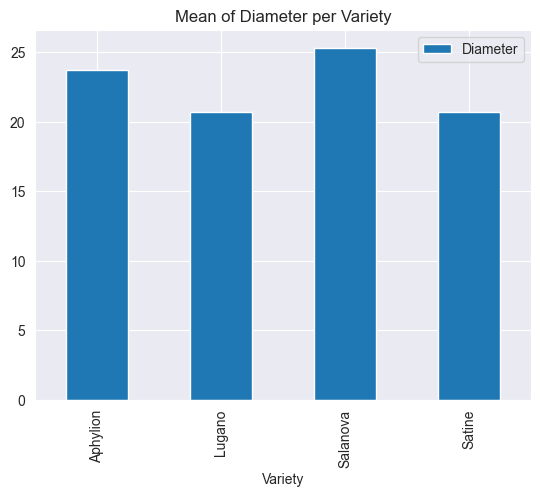

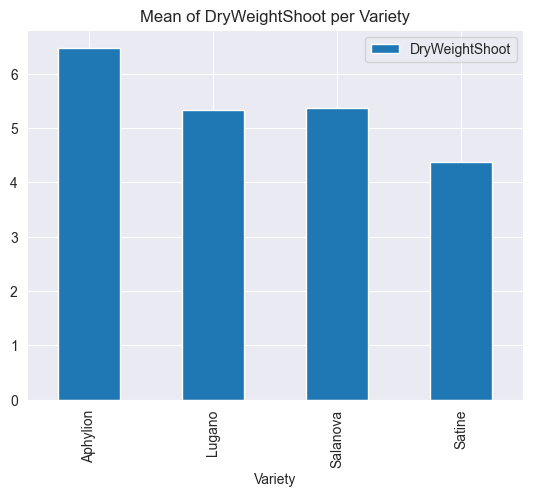

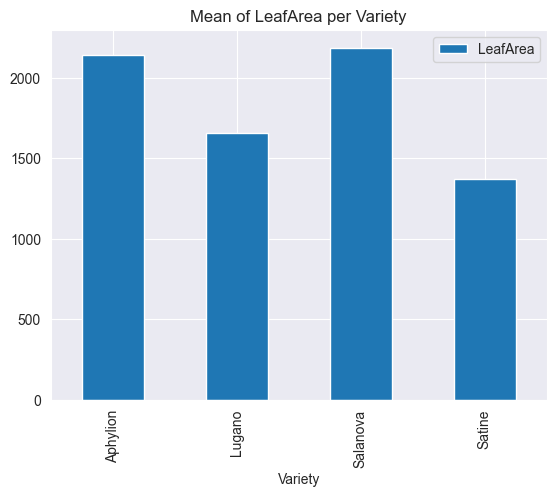

In [19]:
def mean_of_features_plot(feature="Height"):
    df[[feature,"Variety"]].groupby("Variety").mean().plot(kind="bar", title=f"Mean of {feature} per Variety")

mean_of_features_plot("Height")
mean_of_features_plot("Diameter")
mean_of_features_plot("DryWeightShoot")
mean_of_features_plot("LeafArea")

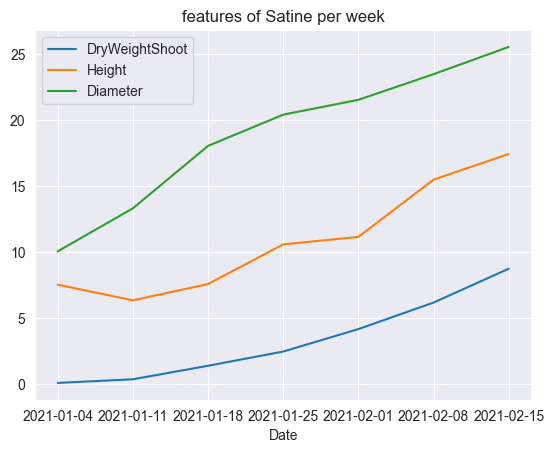

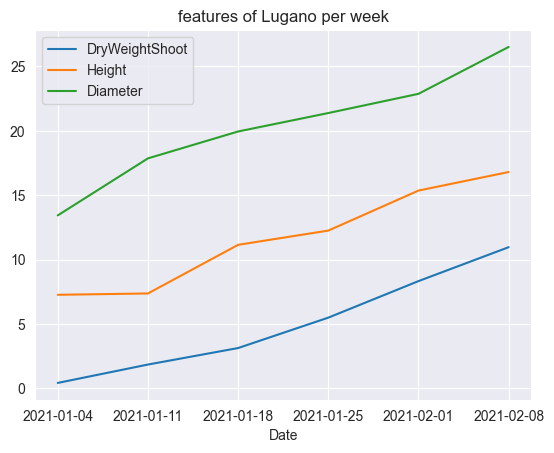

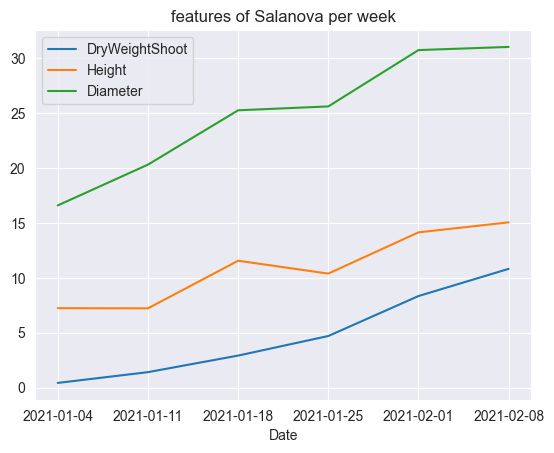

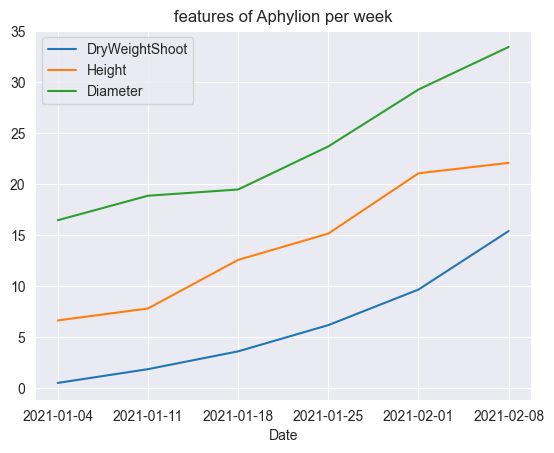

In [20]:
# excluding leafarea and FreshWeightshoot because scale of leaf area is much bigger

def lineplot_mean_features(variety=["Satine"]):
    for item in variety:
        df2 = df[[ "DryWeightShoot", "Height", "Diameter", "Date", "Variety"]].loc[df["Variety"] == item]
        df2.groupby("Date").mean().plot(kind="line", title=f"features of {item} per week")


lineplot_mean_features(["Satine", "Lugano", "Salanova", "Aphylion"])